# Multilayer Perceptron -  em construção

### Importação das bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Using TensorFlow backend.


### Carregamento da base

In [2]:
base = pd.read_csv('iris.csv')
entradas = base.iloc[:, 0:len(base.columns) -1].values 
classes = base.iloc[:,len(base.columns)-1].values
NumColunas = len(base.columns) - 1

### Padronização dos dados

In [3]:
for i in range (len(base.columns)-1):
    entradas[:,i] = (entradas[:,i] - np.median(entradas[:,i]))/entradas[:,i].std(axis = 0)

### Transformação das classes para o tipo dummy

In [4]:
labelEncoder = LabelEncoder()
classes = labelEncoder.fit_transform(classes)
classes_dummy = np_utils.to_categorical(classes)

### Plotagem dos dados (colunas 1 e 2)

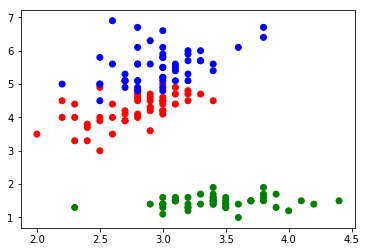

In [5]:
x = base.iloc[:,1].values
y = base.iloc[:,2].values

color= ['red' if l == 1 else 'blue' if l == 2 else 'green' for l in classes]
plt.scatter(x, y, color=color)

### Divisão da base em treinamento (80%) e teste (20%)

In [6]:
entradas_trei, entradas_test, classes_trei, classes_test = train_test_split(entradas, classes_dummy, test_size=0.20)

### Métodos e demais variáveis necessárias

In [7]:
def unique(list1):   
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    return x

In [8]:
def funcaoAtivacao(soma):
    # Logística
    return 1/(1 + np.exp(-soma))
    # Tangente Hiperbólica
    # return (1 - np.exp(-soma)/(1 + np.exp(-soma)))

In [9]:
def derivadaParcial(camadaSaida):
    # Logística
    return camadaSaida * (1 - camadaSaida)
    # Tangente Hiperbólica
    # return 1/2 * (1 - (camadaSaida)**2)

In [10]:
epocas = 1000
NeuroniosCamadaOculta = 8
NumClasses = unique(classes) + 1
pesos0 = 2* np.random.random((NumColunas,NeuroniosCamadaOculta)) -1
pesos1 = 2* np.random.random((NeuroniosCamadaOculta, NumClasses)) -1
momento = 0.9
taxaAprendOcul = 0.5
taxaAprendSai = 0.3

print('Neurônios na camada oculta '+ str(NeuroniosCamadaOculta))
print('Neurônios na camada de saída '+ str(NumClasses))

Neurônios na camada oculta 8
Neurônios na camada de saída 3


## Treinamento

### Atualização dos pesos somente após passar por todas as entradas

In [11]:
for i in range(epocas):
    camadaEntrada = entradas_trei
    # somatório da camada de entrada e camada oculta
    somaSinapse0 = np.dot(camadaEntrada, pesos0)
    # valores para a camada oculta
    camadaOculta = funcaoAtivacao(somaSinapse0)
    # somatório da camada oculta para a camada de saída
    somaSinpase1 = np.dot(camadaOculta, pesos1)
    # valores para a camada saída
    camadaSaida = funcaoAtivacao(somaSinpase1)
        
    # cálculo do erro
    erroCamadaSaida = classes_trei - camadaSaida
    
    # Média absoluta do erro
    mediaErro = np.mean(np.abs(erroCamadaSaida))
    print("Média Absoluta do Erro: "+ str(mediaErro))
    # derivada da camada de saída
    derivadaSaida = derivadaParcial(camadaSaida)
    
    # cálculo do delta afim de encontrar a melhor combinação de pesos
    deltaSaida = erroCamadaSaida * derivadaSaida
    
    # Delta da camada oculta = derivada * peso * deltaSaida
    pesos1T = pesos1.T
    deltaSaidaPeso = deltaSaida.dot(pesos1T)
    deltaOculta = deltaSaidaPeso * derivadaParcial(camadaOculta)
    
    # BackPropagation - 
    # atualização dos pesos da camada de Saída (oculta --> saída)
    camadaOcultaT = camadaOculta.T
    pesosN1 = camadaOcultaT.dot(deltaSaida)
    pesos1 = (pesos1 * momento) + (pesosN1 * taxaAprendSai) 
    
    # Atualização dos pesos da camada oculta (entrada --> oculta)
    camadaEntradaT = camadaEntrada.T
    pesosN0 = camadaEntradaT.dot(deltaOculta)
    pesos0 = (pesos0 * momento) + (pesosN0 * taxaAprendOcul)


Média Absoluta do Erro: 0.44296994519323163
Média Absoluta do Erro: 0.2992746083097122
Média Absoluta do Erro: 0.3364233596374882
Média Absoluta do Erro: 0.20905351279805348
Média Absoluta do Erro: 0.2231064751231367
Média Absoluta do Erro: 0.2521163951222728
Média Absoluta do Erro: 0.2072263215158599
Média Absoluta do Erro: 0.22216942289969996
Média Absoluta do Erro: 0.23540054022606635
Média Absoluta do Erro: 0.22360021453832168
Média Absoluta do Erro: 0.2366124643944771
Média Absoluta do Erro: 0.21963419755455885
Média Absoluta do Erro: 0.23253052381845782
Média Absoluta do Erro: 0.21598953645109253
Média Absoluta do Erro: 0.24111571562243256
Média Absoluta do Erro: 0.21483668601983757
Média Absoluta do Erro: 0.2124750394750695
Média Absoluta do Erro: 0.2307633335895682
Média Absoluta do Erro: 0.2035077804912283
Média Absoluta do Erro: 0.23676362592380235
Média Absoluta do Erro: 0.2018972595508708
Média Absoluta do Erro: 0.21932517369206334
Média Absoluta do Erro: 0.2197959448377289

Média Absoluta do Erro: 0.2376408599900351
Média Absoluta do Erro: 0.19926353489134974
Média Absoluta do Erro: 0.2144473589540016
Média Absoluta do Erro: 0.21931213485162557
Média Absoluta do Erro: 0.2070252847881837
Média Absoluta do Erro: 0.21916055201798518
Média Absoluta do Erro: 0.20563732066969662
Média Absoluta do Erro: 0.22105645940636595
Média Absoluta do Erro: 0.2041844878806813
Média Absoluta do Erro: 0.2151446396182714
Média Absoluta do Erro: 0.2044547961651408
Média Absoluta do Erro: 0.2243160818110252
Média Absoluta do Erro: 0.20506487432957227
Média Absoluta do Erro: 0.20096620754519484
Média Absoluta do Erro: 0.22906095245713762
Média Absoluta do Erro: 0.1978378041654274
Média Absoluta do Erro: 0.22889419043325399
Média Absoluta do Erro: 0.1985869990842358
Média Absoluta do Erro: 0.24038751402318428
Média Absoluta do Erro: 0.1971001379801681
Média Absoluta do Erro: 0.211425374784297
Média Absoluta do Erro: 0.2154430288484247
Média Absoluta do Erro: 0.20538905854098136
M

### Organização das Saídas para plotagem da Matriz de Confusão

In [12]:
classesN = [np.argmax(t) for t in classes_trei]

print(classesN)

[0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1]


In [13]:
SaidasCalcTrein =  [np.argmax(t) for t in camadaSaida]
print(SaidasCalcTrein)

[0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 1]


In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):   

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Saída correta')
    plt.xlabel('Saída encontrada')    

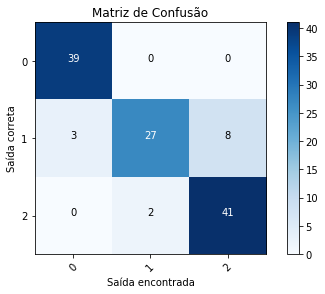

In [15]:
cm = confusion_matrix(classesN, SaidasCalcTrein)
plot_confusion_matrix(cm, 
                      classes=['0', '1', '2'],
                      title='Matriz de Confusão')

## Testes

In [16]:
camadaEntrada = entradas_test
# somatório da camada de entrada e camada oculta
somaSinapse0 = np.dot(camadaEntrada, pesos0)
# valores para a camada oculta
camadaOculta = funcaoAtivacao(somaSinapse0)
# somatório da camada oculta para a camada de saída
somaSinpase1 = np.dot(camadaOculta, pesos1)
# valores para a camada saída
camadaSaida = funcaoAtivacao(somaSinpase1)

# cálculo do erro
erroCamadaSaida = classes_test - camadaSaida
    
# Média absoluta do erro
mediaErro = np.mean(np.abs(erroCamadaSaida))
print("Média Absoluta do Erro: "+ str(mediaErro))

Média Absoluta do Erro: 0.22129899676602108


### Organização das Saídas para plotagem da Matriz de Confusão

In [17]:
classesN = [np.argmax(t) for t in classes_test]

print(classesN)

[1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0]


In [18]:
SaidasCalcTest =  [np.argmax(t) for t in camadaSaida]
print(SaidasCalcTest)

[1, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 0]


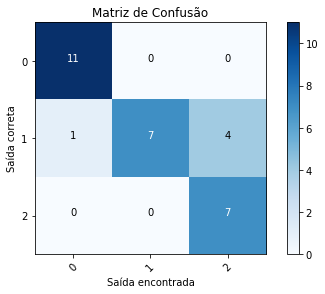

In [19]:
cm = confusion_matrix(classesN, SaidasCalcTest)
plot_confusion_matrix(cm, 
                      classes=['0', '1', '2'],
                      title='Matriz de Confusão')